In [2]:
from rpy2.robjects import r, pandas2ri
import pandas as pd

### Abbreviations used in code

- *wvs:* World Values Survey
- *wvs_w6:* World Values Survey, Wave 6

In [3]:
pandas2ri.activate()
wvs_w6_data = r['readRDS']('raw/F00007762-WV6_Data_R_v20180912')
wvs_w5_data = r['readRDS']('raw/F00007944-WV5_Data_R_v20180912')

In [4]:
wvs_w6_countries = {
  8: 'Albania',
 12: 'Algeria',
 16: 'American Samoa',
 20: 'Andorra',
 24: 'Angola',
 28: 'Antigua and Barbuda',
 31: 'Azerbaijan',
 32: 'Argentina',
 36: 'Australia',
 40: 'Austria',
 50: 'Bangladesh',
 51: 'Armenia',
 52: 'Barbados',
 56: 'Belgium',
 60: 'Bermuda',
 64: 'Bhutan',
 68: 'Bolivia',
 70: 'Bosnia',
 72: 'Botswana',
 76: 'Brazil',
 84: 'Belize',
100: 'Bulgaria',
854: 'Burkina Faso',
104: 'Myanmar',
108: 'Burundi',
112: 'Belarus',
116: 'Cambodia',
120: 'Cameroon',
124: 'Canada',
144: 'Sri Lanka',
148: 'Chad',
152: 'Chile',
156: 'China',
158: 'Taiwan',
170: 'Colombia',
180: 'Dem. Rep. of Congo',
184: 'Cook Islands',
188: 'Costa Rica',
191: 'Croatia',
192: 'Cuba',
196: 'Cyprus',
203: 'Czech Republic',
208: 'Denmark',
214: 'Dominican Republic',
218: 'Ecuador',
222: 'El Salvador',
226: 'Equatorial Guinea',
231: 'Ethiopia',
232: 'Eritrea',
233: 'Estonia',
246: 'Finland',
250: 'France',
268: 'Georgia',
270: 'Gambia',
275: 'Palestine',
276: 'Germany',
288: 'Ghana',
292: 'Gibraltar',
300: 'Greece',
320: 'Guatemala',
324: 'Guinea',
328: 'Guyana',
332: 'Haiti',
340: 'Honduras',
344: 'Hong Kong',
348: 'Hungary',
352: 'Iceland',
356: 'India',
360: 'Indonesia',
364: 'Iran',
368: 'Iraq',
372: 'Ireland',
376: 'Israel',
380: 'Italy',
384: 'Côte d´Ivoire',
388: 'Jamaica',
392: 'Japan',
398: 'Kazakhstan',
400: 'Jordan',
404: 'Kenya',
408: 'North Korea',
410: 'South Korea',
414: 'Kuwait',
417: 'Kyrgyzstan',
418: 'Laos',
422: 'Lebanon',
426: 'Lesotho',
428: 'Latvia',
430: 'Liberia',
434: 'Libya',
438: 'Liechtenstein',
440: 'Lithuania',
442: 'Luxembourg',
450: 'Madagascar',
454: 'Malawi',
458: 'Malaysia',
466: 'Mali',
470: 'Malta',
474: 'Martinique',
478: 'Mauritania',
480: 'Mauritius',
484: 'Mexico',
492: 'Monaco',
496: 'Mongolia',
498: 'Moldova',
504: 'Morocco',
508: 'Mozambique',
512: 'Oman',
516: 'Namibia',
524: 'Nepal',
528: 'Netherlands',
554: 'New Zealand',
558: 'Nicaragua',
562: 'Niger',
566: 'Nigeria',
578: 'Norway',
586: 'Pakistan',
591: 'Panama',
598: 'Papua New Guinea',
600: 'Paraguay',
604: 'Peru',
608: 'Philippines',
616: 'Poland',
620: 'Portugal',
624: 'Guinea-Bissau',
626: 'Timor-Leste',
630: 'Puerto Rico',
634: 'Qatar',
642: 'Romania',
643: 'Russia',
646: 'Rwanda',
682: 'Saudi Arabia',
686: 'Senegal',
690: 'Seychelles',
694: 'Sierra Leone',
702: 'Singapore',
703: 'Slovakia',
704: 'Viet Nam',
705: 'Slovenia',
706: 'Somalia',
710: 'South Africa',
716: 'Zimbabwe',
724: 'Spain',
736: 'Sudan',
740: 'Suriname',
752: 'Sweden',
756: 'Switzerland',
760: 'Syria',
762: 'Tajikistan',
764: 'Thailand',
768: 'Togo',
780: 'Trinidad',
784: 'United Arab Emirates',
788: 'Tunisia',
792: 'Turkey',
795: 'Turkmenistan',
800: 'Uganda',
804: 'Ukraine',
807: 'Macedonia',
818: 'Egypt',
826: 'Great Britain',
834: 'Tanzania',
840: 'United States',
850: 'U.S. Virgin Islands',
854: 'Burkina Faso',
858: 'Uruguay',
860: 'Uzbekistan',
862: 'Venezuela',
887: 'Yemen',
891: 'Serbia and Montenegro',
894: 'Zambia',
900: 'West Germany',
901: 'East Germany',
902: 'Tambov',
903: 'Moscow',
904: 'Basque Country',
906: 'Andalusia',
907: 'Galicia',
909: 'North Ireland',
910: 'Valencia',
911: 'Serbia',
912: 'Montenegro',
913: 'SrpSka Republic',
}


wvs_w6_columns = {
  'V2': 'country',
  'V103': 'trust neighbors',
  'V104': 'trust people you know',
  'V105': 'trust new people',
  'V106': 'trust people of different religion',
  'V107': 'trust people of different nationality',
  'V108': 'trust churches',
  'V109': 'trust armed forces',
  'V110': 'trust the press',
  'V113': 'trust the police',
  'V114': 'trust the courts',
  'V115': 'trust the government',
  'V117': 'trust the parliament',
  'V120': 'trust major companies',
}

wvs_w5_columns = {
  'V2': 'country',
  'V126': 'trust neighbors',
  'V127': 'trust people you know',
  'V128': 'trust new people',
  'V129': 'trust people of different religion',
  'V130': 'trust people of different nationality',
  'V131': 'trust churches',
  'V132': 'trust armed forces',
  'V133': 'trust the press',
  'V136': 'trust the police',
  'V137': 'trust the courts',
  'V138': 'trust the government',
  'V140': 'trust the parliament',
  'V142': 'trust major companies',
}

wvs_w6_trust_coding = {
  1: 'completely',
  2: 'somewhat',
  3: 'not much',
  4: 'not at all'
}

wvs_w6_named = wvs_w6_data[list(wvs_w6_columns.keys())].rename(columns=wvs_w6_columns)

wvs_w6_named['country'] = wvs_w6_named['country'].map(wvs_w6_countries)


In [5]:
wvs_w6_means = wvs_w6_named.groupby('country').mean()
    

In [12]:
from collections import namedtuple
from fn import F

CountryAlias = namedtuple('CountryAlias', ['cannonical', 'aliases'])

country_aliases = [
  CountryAlias('Bosnia', [ 'Bosnia and Herzegovina' ]),
  CountryAlias('Congo, Dem. Rep.', [ 'Congo, Dem. Rep.', 'Dem. Rep. of Congo']),
  CountryAlias('Cote D\'Ivoire', [ "Cote d'Ivoire", 'Côte d´Ivoire']),
  CountryAlias('United Kingdom', ['Great Britain', 'United Kingdom']),
]

corruption = pd.read_csv('raw/abscorrup_idea.csv')

poverty = pd.read_csv('raw/alternative_poverty_percent_below_nationally_defined_poverty.csv')

gini_index = pd.read_csv('raw/gini.csv')

gdp = pd.read_csv('raw/income_per_person_gdppercapita_ppp_inflation_adjusted.csv')

murders = pd.read_csv('raw/murder_per_100000_people.csv')

Period = namedtuple('Period', ['name', 'years'])
periods = [
  Period('Wave 4 1999-2004', list(map(str, range(1999, 2005)))),
  Period('Wave 5 2005-2009', list(map(str, range(2005, 2010)))),
  Period('Wave 6 2010-2014', list(map(str, range(2010, 2015)))),
  Period('Current 2015-2019', list(map(str, range(2015, 2020))))
]

def index_country(df):
  return df.set_index('country')

def map_second(f):
    return lambda t: (t[0], f(t[1]))

def map_values(f, d):
    it = map_second(f)
    return dict(map(it, d.items()))

def only_in(rng, df):
    return df

all_no_periods = pd.concat(
  map_values(index_country, {'corruption': corruption, 
   'gdp': gdp, 
   'gini': gini_index, 
   'murders': murders, 
   'poverty': poverty}), 
)[map(str, range(1999, 2020))]

def to_periods(periods, df):
  for (name, years) in periods:
    available = list(set(df.columns).intersection(years))
    df[name] = df[available].mean(axis=1)
  return df[list(map(lambda x: x.name, periods))]
    
to_index_and_periods = F(index_country) >> F(to_periods, periods)
corruption_periods, poverty_periods, gini_periods, gdp_periods, murders_periods = \
  list(map(to_index_and_periods, [corruption, poverty, gini_index, gdp, murders]))

all_by_periods = pd.concat(
  {'corruption': corruption_periods, 
   'gdp': gdp_periods, 
   'gini': gini_periods, 
   'murders': murders_periods, 
   'poverty': poverty_periods}, 
  axis=1, sort=False, join='outer')


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x17b852850>,
      dtype=object)

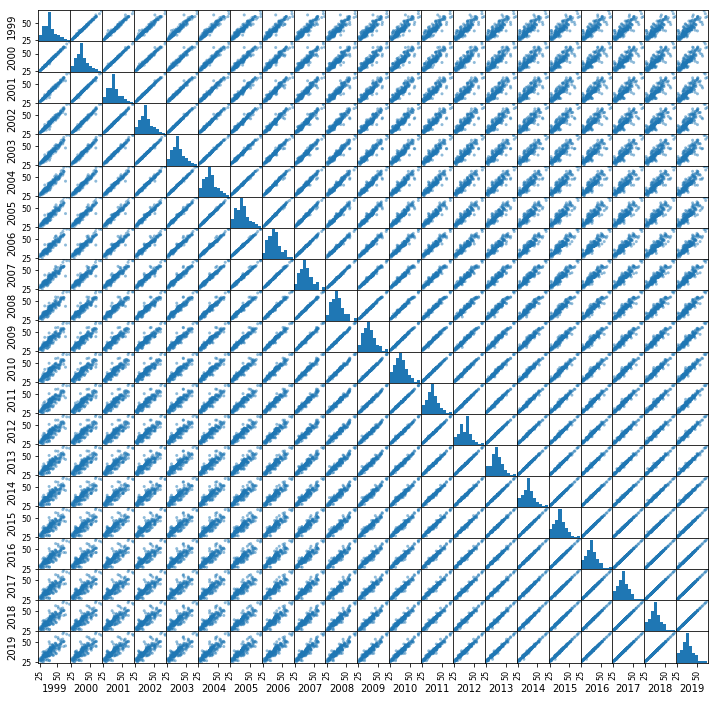

In [22]:
import matplotlib.pyplot as plt

plt.close('all')

# pd.plotting.scatter_matrix(all_by_periods[['gdp', 'gini']], figsize=(12,12))

pd.plotting.scatter_matrix(all_no_periods.loc['gini'], figsize=(12,12))


In [8]:
wvs_w6_means

,trust neighbors,trust people you know,trust new people,trust people of different religion,trust people of different nationality,trust churches,trust armed forces,trust the press,trust the police,trust the courts,trust the government,trust the parliament,trust major companies
country,,,,,,,,,,,,,
Algeria,2.215000,2.224167,3.147500,2.815833,2.660000,1.657500,1.991667,2.412500,2.098333,2.024167,2.114167,2.008333,1.988333
Argentina,2.071845,1.862136,2.876699,2.047573,2.079612,2.517476,2.791262,2.599029,3.010680,3.072816,2.812621,2.810680,2.681553
Armenia,2.145455,2.036364,3.152727,3.120000,2.766364,1.737273,1.537273,2.783636,2.678182,2.752727,2.650909,2.840909,2.103636
Australia,2.022343,1.508463,2.470548,2.128639,2.113067,2.708192,1.756263,2.914015,1.813135,2.191605,2.738659,2.678402,2.405552
Azerbaijan,2.466068,2.524950,3.463074,2.701597,2.759481,2.720559,1.974052,2.602794,2.348303,2.386228,1.823353,2.230539,2.445110
Belarus,2.196091,2.010423,3.034528,2.672313,2.670358,2.026710,2.058632,2.710749,2.468404,2.429316,2.401954,2.521173,2.411075
Brazil,2.537012,2.462315,3.348587,2.433378,2.827052,2.150067,2.157470,2.684388,2.765814,2.617093,2.810229,3.195155,2.343203
Chile,2.165000,2.011000,2.734000,2.049000,2.116000,2.339000,2.390000,2.432000,2.207000,2.889000,2.799000,2.927000,2.787000
China,1.682174,1.671739,2.490435,0.183043,0.600435,1.673478,1.391304,1.654348,1.730000,1.566522,1.380870,1.432609,1.517826
